Sales over time 

Packages 

In [ ]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

Data

In [ ]:
df1 = read_csv("climate_data.csv")
df2 = read_csv("barbecue_sauce_sales.csv")

merged_df = pd.merge(df1, df2, on="date", how ="inner")





Sales Overtime

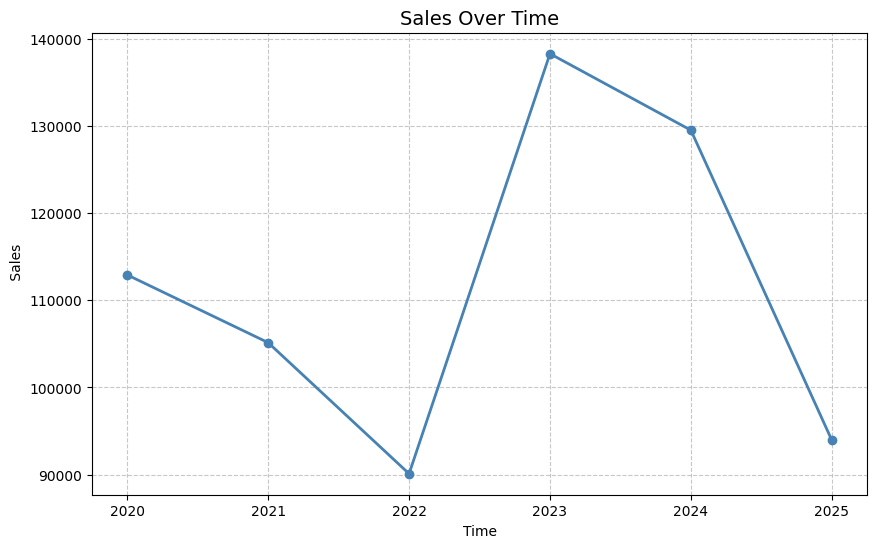

In [ ]:
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

merged_df['year'] = merged_df['date'].dt.year

sales_per_year = merged_df.groupby('year')['amount'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_per_year['year'], sales_per_year['amount'], marker='o', linewidth=2, color='steelblue')
plt.title('Sales Over Time', fontsize=14)
plt.xlabel('Time')
plt.ylabel(' Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()











The graph shows total sales from 2020 to 2025, with fluctuations rather than a steady increase or decrease,
the trend starts moderately high in 2020, dips in 2021 to 2022, then rises sharply in 2023 before falling again in 2024 to 2025.

Ananlysis

2020 to 2022 
The mean temperature and sun hours, lower warmth or less sunshine in these years could have reduced outdoor activities like barbecuing could have had a direct impact on barbecue sauce sales.Similarly, higher precipitation in 2021 to 2022 could discourage outdoor gatherings, leading to lower consumption.
 
 Possible inference 
 The declining  in sales could be associated with less favorable weather for outdoor activities 

 2023
 A year with warmer average temperatures, lower rainfall, and more sun hours nationwide would create ideal conditions for outdoor activities and grilling. Increased sunshine and heat correlate with people hosting more barbecues thus driving sauce sales up. Potentually if 2023 saw low precipitation and long summer periods, that would have amplified this surge.

 Possible inference is that the high sales sales in 2023 is likely due to favourable weather patterns experienced in that year. 

 2024
The Weather  in this year might have remained good but slightly less ideal for instance, a small rise in rainfall or fewer sun hours could explain a modest drop. However, it is  also possible that the market reached near saturation, demand stabilized after 2023 boom.

This could be infered to be a stable year, possibly reflecting consistent climate and strong consumer demand, but not execptional condition for 2023.

2025
Could be a result of unfavorable weather acampanied by cooler or wetter conditions and  the increased precipitation and reduced sunshine could discourage outdoor events, lowering sales.
Alternatively, if 2025 experienced more extreme weather such as storms or colder averages, people would grill less frequently.

Possible inference in 2025,sales declined likely due to weather regression, less sunshine or more rain impacting barbecue related behavior.








Weakly Seasonality

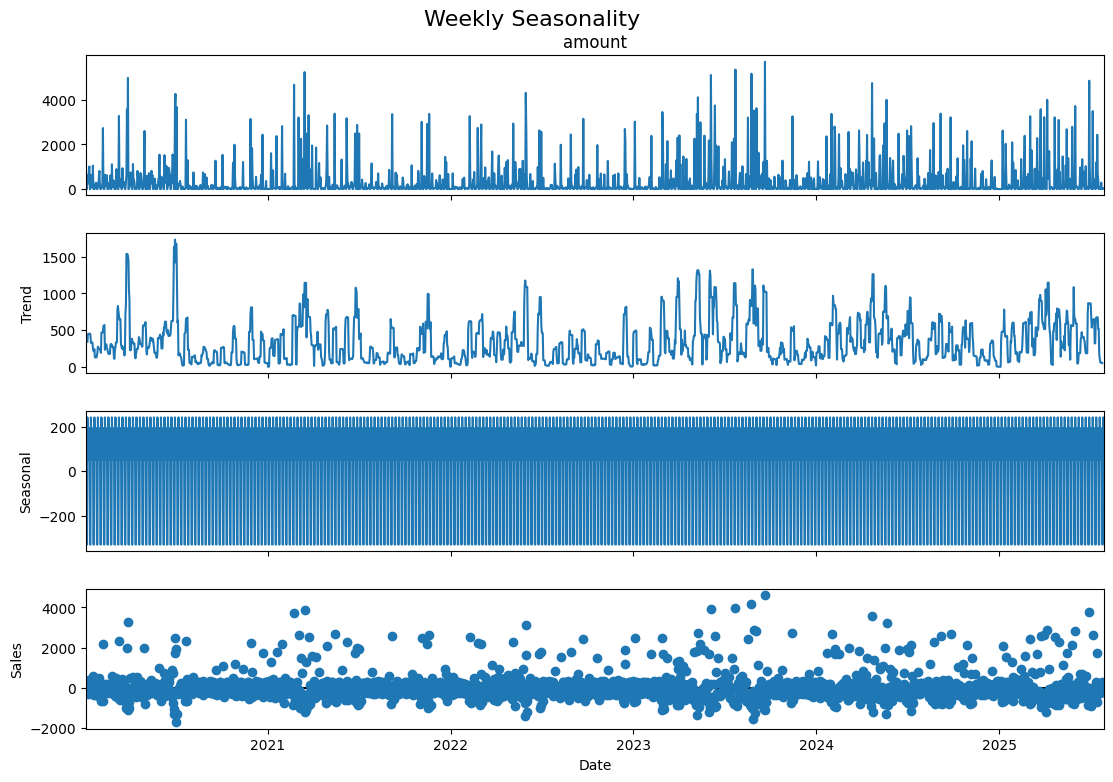

In [ ]:
merged_df = pd.merge(df1, df2, on="date", how="inner")

merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

merged_df = merged_df.sort_values('date').set_index('date')

daily_sales = merged_df['amount'].resample('D').sum()

decomposition = seasonal_decompose(daily_sales, model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Weekly Seasonality', fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


Monthly sales Decomposition

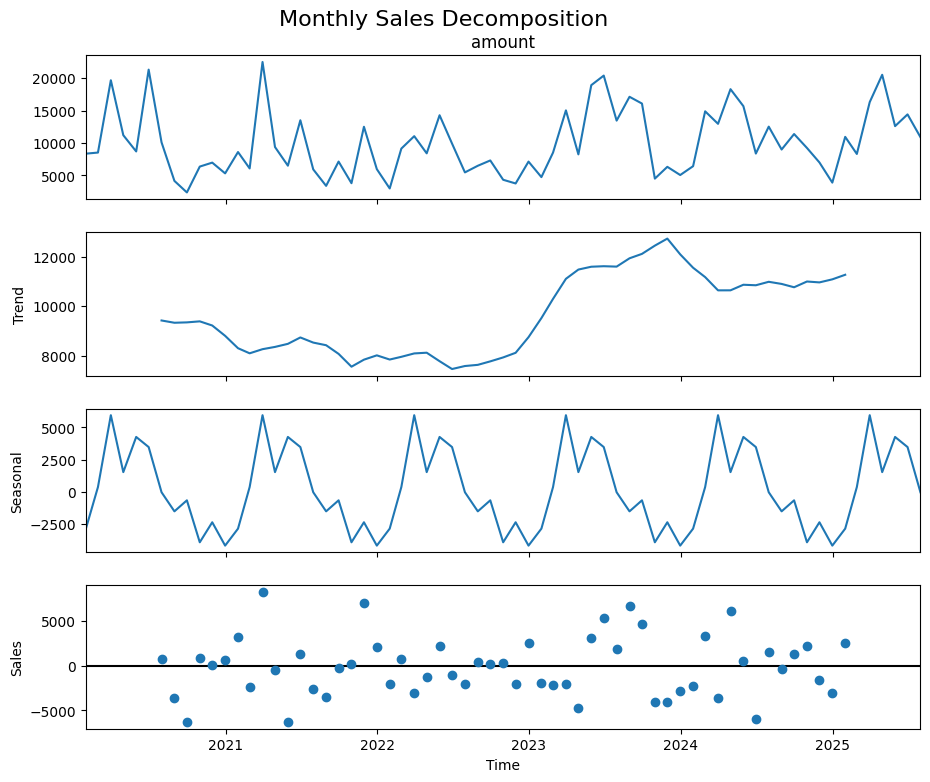

In [ ]:

df1 = pd.read_csv("climate_data.csv")
df2 = pd.read_csv("barbecue_sauce_sales.csv")


merged_df = pd.merge(df1, df2, on="date", how="inner")


merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')


merged_df = merged_df.sort_values('date').set_index('date')

monthly_sales = merged_df['amount'].resample('ME').sum()

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Monthly Sales Decomposition', fontsize=16)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

Yearly Seasonality

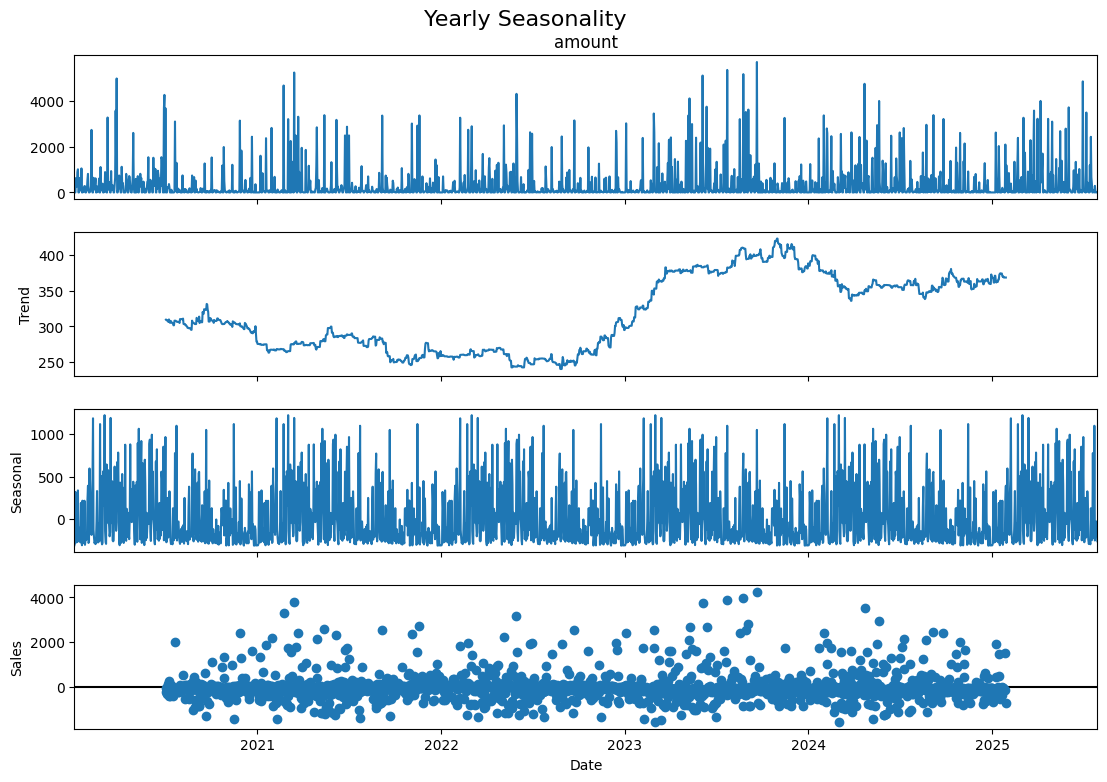

In [ ]:

merged_df = pd.merge(df1, df2, on="date", how="inner")

merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

merged_df = merged_df.sort_values('date').set_index('date')

daily_sales = merged_df['amount'].resample('D').sum().asfreq('D').fillna(0)


decomposition = seasonal_decompose(daily_sales, model='additive', period=365)


fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Yearly Seasonality', fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
